Carga inicial de datos y validacion de explorarion de datos y variables

Datos iniciales:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Resumen estadístico:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000

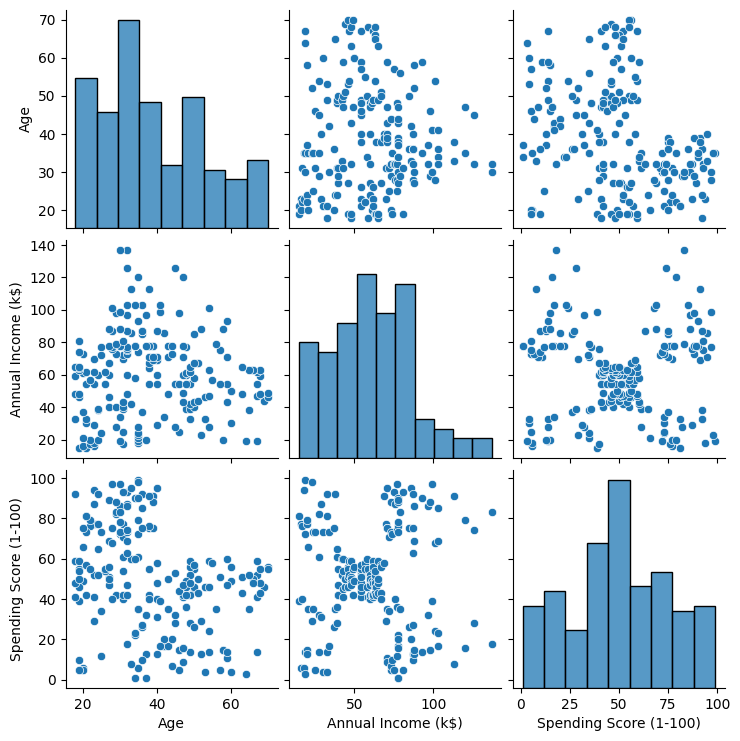

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

# Cargar los datos
data = pd.read_csv('Mall_Customers.csv')

df = pd.DataFrame(data)

# Mostrar primeras filas
print("Datos iniciales:")
print(df.head())

# Resumen estadístico
print("\nResumen estadístico:")
print(df.describe())

# Verificar valores nulos
print("\nValores nulos:")
print(df.isnull().sum())

# Distribuciones
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()


Preprocesamiento de datos

In [22]:
# Codificar el género
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

# Escalar características numéricas
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
scaled_df = pd.DataFrame(scaled_features, columns=['Age', 'Annual Income', 'Spending Score'])

# Verificar los datos escalados
print("\nDatos escalados:")
print(scaled_df.head())


Datos escalados:
        Age  Annual Income  Spending Score
0 -1.424569      -1.738999       -0.434801
1 -1.281035      -1.738999        1.195704
2 -1.352802      -1.700830       -1.715913
3 -1.137502      -1.700830        1.040418
4 -0.563369      -1.662660       -0.395980


Determinar el número óptimo de clusters usando el método del codo

In [23]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

Gráfica del método del codo

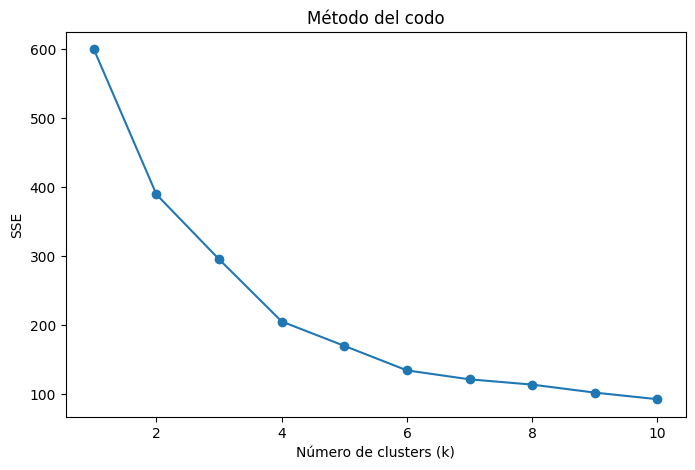

In [24]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE')
plt.title('Método del codo')
plt.show()

Entrenar el modelo K-means con el número óptimo de clusters (asumiendo k=4) 

In [25]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster_Kmeans'] = kmeans.fit_predict(scaled_df)

Evaluacion del modelo   

In [26]:
silhouette_kmeans = silhouette_score(scaled_df, df['Cluster_Kmeans'])
calinski_kmeans = calinski_harabasz_score(scaled_df, df['Cluster_Kmeans'])
print(f"Coeficiente de Silhouette (K-means): {silhouette_kmeans:.2f}")
print(f"Índice de Calinski-Harabasz (K-means): {calinski_kmeans:.2f}")

Coeficiente de Silhouette (K-means): 0.40
Índice de Calinski-Harabasz (K-means): 125.68


Visualización de los clusters

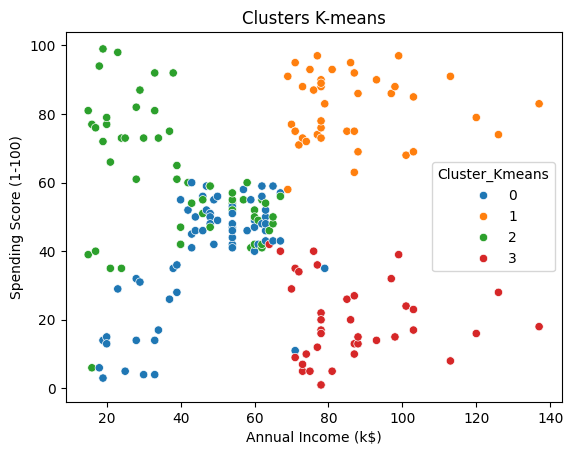

In [27]:
sns.scatterplot(x ='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_Kmeans', data=df, palette='tab10')
plt.title('Clusters K-means')
plt.show()

Clustering Jerárquico

Generacion de dendograma

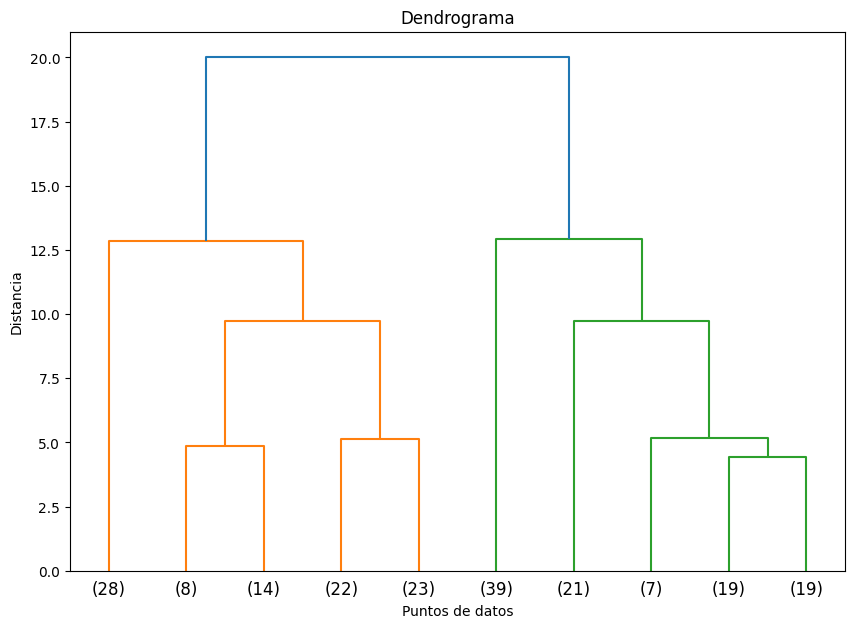

In [28]:
linkage_matrix = linkage(scaled_df, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=10)
plt.title('Dendrograma')
plt.xlabel('Puntos de datos')
plt.ylabel('Distancia')
plt.show()

 Entrenar el modelo jerárquico

In [34]:
hierarchical = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
df['Cluster_Hierarchical'] = hierarchical.fit_predict(scaled_df.values)

Evaluacion del modelo

In [35]:
silhouette_hierarchical = silhouette_score(scaled_df, df['Cluster_Hierarchical'])
calinski_hierarchical = calinski_harabasz_score(scaled_df, df['Cluster_Hierarchical'])
print(f"Coeficiente de Silhouette (Jerárquico): {silhouette_hierarchical:.2f}")
print(f"Índice de Calinski-Harabasz (Jerárquico): {calinski_hierarchical:.2f}")

Coeficiente de Silhouette (Jerárquico): 0.36
Índice de Calinski-Harabasz (Jerárquico): 102.02


Visualizacion de los cluster

In [37]:
print(df.columns)


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster_Kmeans', 'Cluster_Hierarchical'],
      dtype='object')


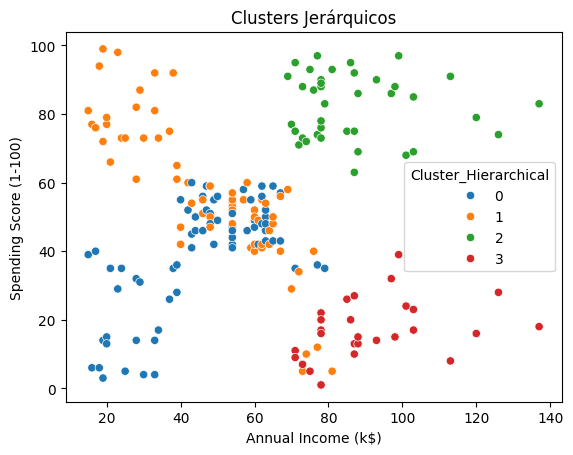

In [38]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_Hierarchical', data=df, palette='tab10')
plt.title('Clusters Jerárquicos')
plt.show()